<a href="https://colab.research.google.com/github/SOWMIYA-AB/student_scores_project/blob/main/week_3_task_2__%2C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np


In [5]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

train_filter = np.where((y_train == 3) | (y_train == 5))[0]
test_filter = np.where((y_test == 3) | (y_test == 5))[0]

X_train = X_train[train_filter]
y_train = y_train[train_filter]
X_test = X_test[test_filter]
y_test = y_test[test_filter]

y_train = (y_train == 5).astype(int)
y_test = (y_test == 5).astype(int)


In [6]:
image_size = (96, 96)

X_train = tf.image.resize(X_train, image_size).numpy() / 255.0
X_test = tf.image.resize(X_test, image_size).numpy() / 255.0


In [7]:
from sklearn.model_selection import train_test_split

X_train_new, X_val, y_train_new, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)


In [8]:
base_model = MobileNetV2(
    weights="imagenet",
    include_top=False,
    input_shape=(96, 96, 3)
)
base_model.trainable = False


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [9]:
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_96             │ (None, 3, 3, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [10]:
history = model.fit(
    X_train_new, y_train_new,
    epochs=5,
    validation_data=(X_val, y_val),
    batch_size=32
)


Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 76s 278ms/step - accuracy: 0.7409 - loss: 0.5272 - val_accuracy: 0.7995 - val_loss: 0.4245
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 74s 295ms/step - accuracy: 0.8442 - loss: 0.3632 - val_accuracy: 0.8080 - val_loss: 0.4128
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 74s 262ms/step - accuracy: 0.8521 - loss: 0.3320 - val_accuracy: 0.8050 - val_loss: 0.4211
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 75s 299ms/step - accuracy: 0.8591 - loss: 0.3248 - val_accuracy: 0.8160 - val_loss: 0.4169
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 73s 263ms/step - accuracy: 0.8816 - loss: 0.2733 - val_accuracy: 0.8020 - val_loss: 0.4748


In [11]:
loss, acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", acc)


63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - accuracy: 0.8066 - loss: 0.4671
Test Accuracy: 0.8029999732971191


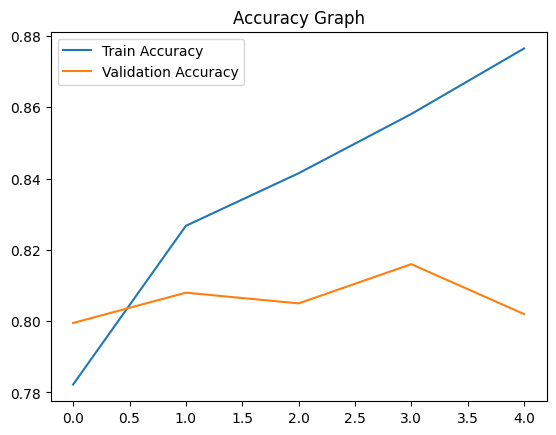

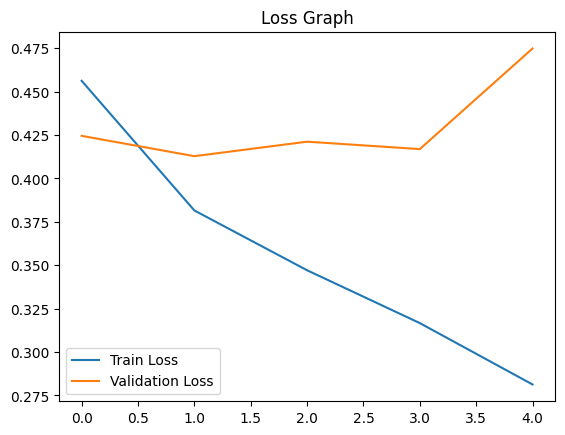

In [12]:
# Accuracy Graph
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy Graph")
plt.show()

# Loss Graph
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss Graph")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


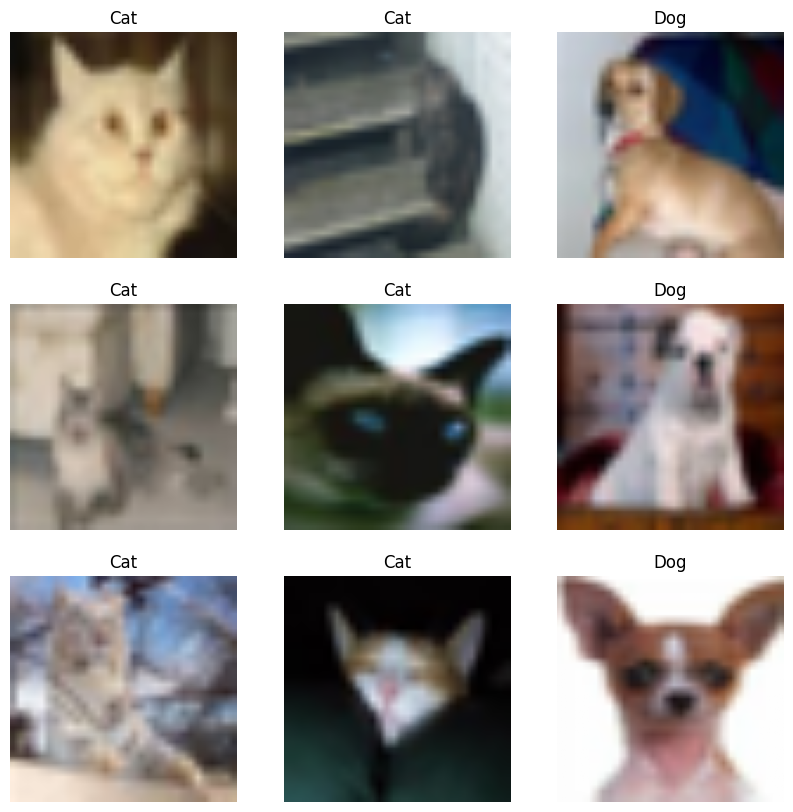

In [13]:
import random

indexes = random.sample(range(len(X_test)), 9)

plt.figure(figsize=(10,10))
for i, idx in enumerate(indexes):
    img = X_test[idx]
    pred = model.predict(img.reshape(1,96,96,3))[0][0]
    label = "Dog" if pred > 0.5 else "Cat"

    plt.subplot(3,3,i+1)
    plt.imshow(img)
    plt.title(label)
    plt.axis("off")

plt.show()
